# **Spam Classifier**

In [62]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk # biblioteca de NLP
import string
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

ps = PorterStemmer()

nltk.download('punkt') # modelo para a tokenização

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BeatrizAlmeida\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 1. Data Cleaning

In [7]:
data = pd.read_csv("data/spam.csv", encoding='latin1')
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
data.shape

(5572, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [11]:
data.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
data.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
data.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
encoder = LabelEncoder()

data['target'] = encoder.fit_transform(data['target'])

In [17]:
data.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
data.duplicated().sum()

403

In [21]:
data = data.drop_duplicates(keep='first')

In [22]:
data.duplicated().sum()

0

In [23]:
data.shape

(5169, 2)

## 2. EDA

In [24]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

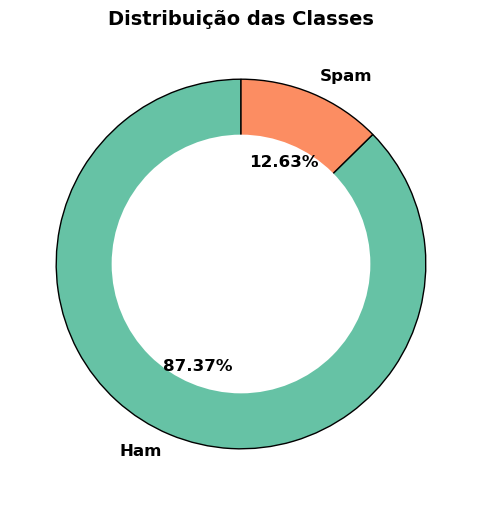

In [27]:
import matplotlib.pyplot as plt


counts = data['target'].value_counts()

colors = ['#66c2a5', '#fc8d62']

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    counts, 
    labels=['Ham', 'Spam'], 
    autopct='%0.2f%%', 
    startangle=90, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black'}, 
    textprops={'fontsize': 12, 'weight': 'bold'}
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Distribuição das Classes', fontsize=14, weight='bold')
plt.show()


In [32]:
data['num_chars'] = data['text'].apply(len)
data.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x))) # divisão do texto em tokens
data.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x))) # divisão do texto em sentenças
data.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
data[['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
data[data['target'] == 0][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
data[data['target'] == 1][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


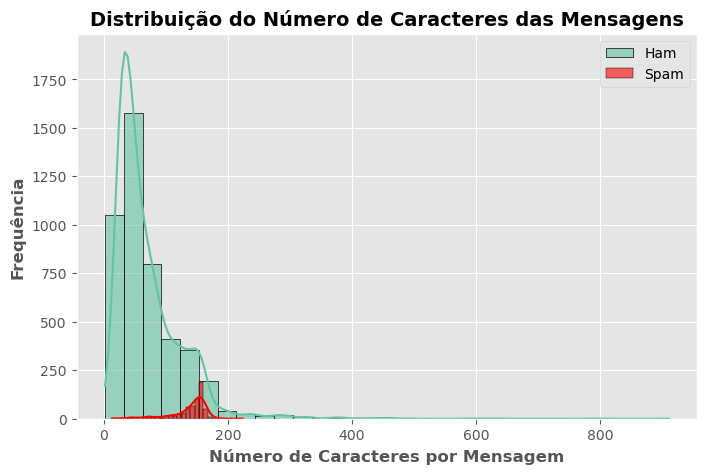

In [46]:
plt.style.use('ggplot')

plt.figure(figsize=(8, 5))

sns.histplot(
    data[data['target'] == 0]['num_chars'], 
    bins=30, 
    kde=True, 
    color='#66c2a5', 
    edgecolor='black', 
    alpha=0.6, 
    label='Ham'
)

sns.histplot(
    data[data['target'] == 1]['num_chars'], 
    bins=30, 
    kde=True, 
    color='red', 
    edgecolor='black', 
    alpha=0.6, 
    label='Spam'
)

plt.xlabel('Número de Caracteres por Mensagem', fontsize=12, weight='bold')
plt.ylabel('Frequência', fontsize=12, weight='bold')
plt.title('Distribuição do Número de Caracteres das Mensagens', fontsize=14, weight='bold')
plt.legend()

plt.show()

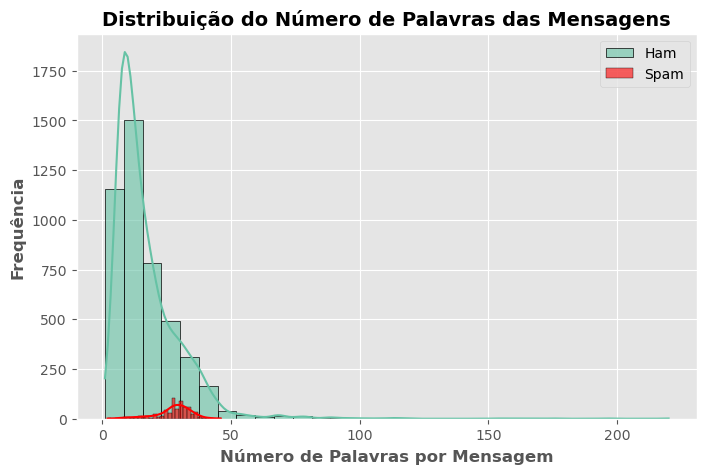

In [47]:
plt.style.use('ggplot')

plt.figure(figsize=(8, 5))

sns.histplot(
    data[data['target'] == 0]['num_words'], 
    bins=30, 
    kde=True, 
    color='#66c2a5', 
    edgecolor='black', 
    alpha=0.6, 
    label='Ham'
)

sns.histplot(
    data[data['target'] == 1]['num_words'], 
    bins=30, 
    kde=True, 
    color='red', 
    edgecolor='black', 
    alpha=0.6, 
    label='Spam'
)

plt.xlabel('Número de Palavras por Mensagem', fontsize=12, weight='bold')
plt.ylabel('Frequência', fontsize=12, weight='bold')
plt.title('Distribuição do Número de Palavras das Mensagens', fontsize=14, weight='bold')
plt.legend()

plt.show()

c:\Users\BeatrizAlmeida\anaconda3\envs\mnist\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


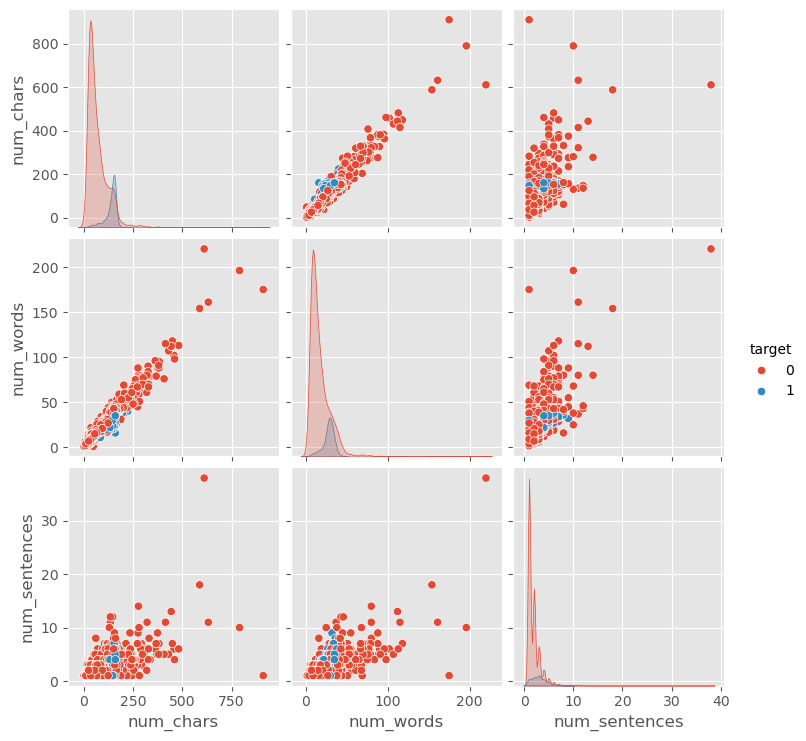

In [48]:
sns.pairplot(data, hue='target')

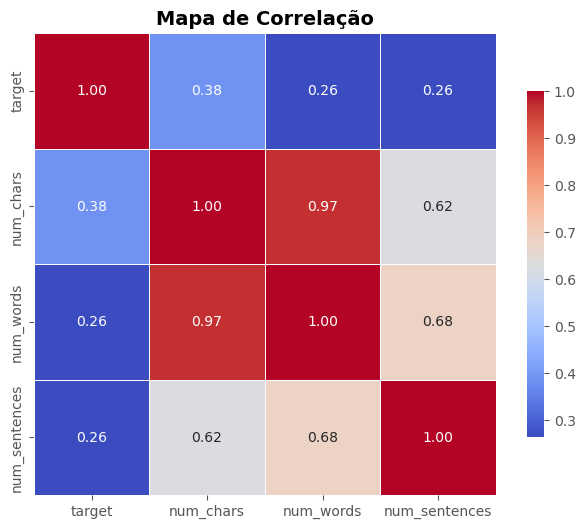

In [51]:
plt.figure(figsize=(8, 6))

sns.heatmap(
    data.corr(numeric_only=True), 
    annot=True,  # exibe os valores dentro das células
    fmt=".2f",  
    cmap="coolwarm",  
    linewidths=0.5,  
    square=True,  
    cbar_kws={'shrink': 0.75}  # ajusta a barra de cores para ficar proporcional
)

plt.title('Mapa de Correlação', fontsize=14, weight='bold')

plt.show()

## 3. Text Processing

- lower case
- tokenization
- removing special chars
- removing stop words and punctuation
- stemming

In [57]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum(): # deixar somente alfanumericos
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [58]:
data['transformed_text'] = data['text'].apply(transform_text)
data.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

## 5.Evaluation

## 6. Improvement

## 7. Website

## 8. Deploy